In [9]:
import pandas as pd

file_path = 'sample_data/Earthquakes_database.csv'
earthquakes_data = pd.read_csv(file_path)

earthquakes_data.info(), earthquakes_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

(None,
        Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
 0  1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
 1  1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
 2  1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
 3  1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
 4  1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   
 
    Depth Seismic Stations  Magnitude Magnitude Type  ...  \
 0                     NaN        6.0             MW  ...   
 1                     NaN        5.8             MW  ...   
 2                     NaN        6.2             MW  ...   
 3                     NaN        5.8             MW  ...   
 4                     NaN        5.8             MW  ...   
 
    Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
 0                         NaN            NaN                  NaN   
 1       

In [10]:
earthquakes_data['Date'] = pd.to_datetime(earthquakes_data['Date'], errors='coerce')

earthquakes_data['Year'] = earthquakes_data['Date'].apply(lambda x: x.year if pd.notnull(x) else None)
earthquakes_data['Month'] = earthquakes_data['Date'].apply(lambda x: x.month if pd.notnull(x) else None)
earthquakes_data['Day'] = earthquakes_data['Date'].apply(lambda x: x.day if pd.notnull(x) else None)

threshold = 0.5  # Threshold for missing values
columns_to_drop = earthquakes_data.columns[earthquakes_data.isnull().mean() > threshold]
earthquakes_data.drop(columns=columns_to_drop, inplace=True)

earthquakes_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9


In [11]:
magnitude_range = earthquakes_data['Magnitude'].describe()
min_magnitude = magnitude_range['min'] - 0.1
bins = [min_magnitude, 5.5, 6.5, magnitude_range['max']]
labels = ['Low', 'Moderate', 'High']
earthquakes_data['Magnitude Category'] = pd.cut(earthquakes_data['Magnitude'], bins=bins, labels=labels, include_lowest=True)

earthquakes_data[['Magnitude', 'Magnitude Category']].head()

,Magnitude,Magnitude Category
0,6.0,Moderate
1,5.8,Moderate
2,6.2,Moderate
3,5.8,Moderate
4,5.8,Moderate


In [12]:
pivot_table = earthquakes_data.pivot_table(values='Magnitude', index='Year', columns='Magnitude Category', aggfunc='mean')

melted_data = earthquakes_data.melt(id_vars=['Year', 'Month', 'Day'], value_vars=['Magnitude'])

print(pivot_table.head())
print(melted_data.head())


Magnitude Category  Low  Moderate      High
Year                                       
1965                5.5  5.900000  7.120000
1966                5.5  5.916188  6.962069
1967                5.5  5.895000  6.841935
1968                5.5  5.944297  7.068421
1969                5.5  5.902960  6.929730
   Year  Month  Day   variable  value
0  1965      1    2  Magnitude    6.0
1  1965      1    4  Magnitude    5.8
2  1965      1    5  Magnitude    6.2
3  1965      1    8  Magnitude    5.8
4  1965      1    9  Magnitude    5.8


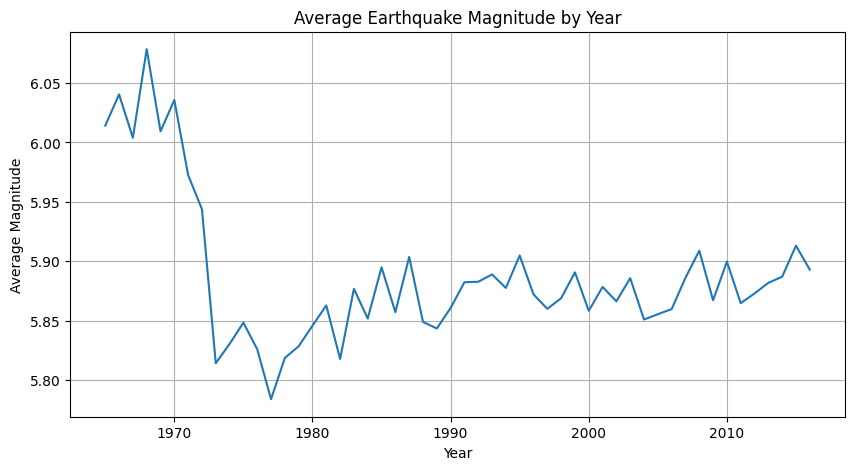

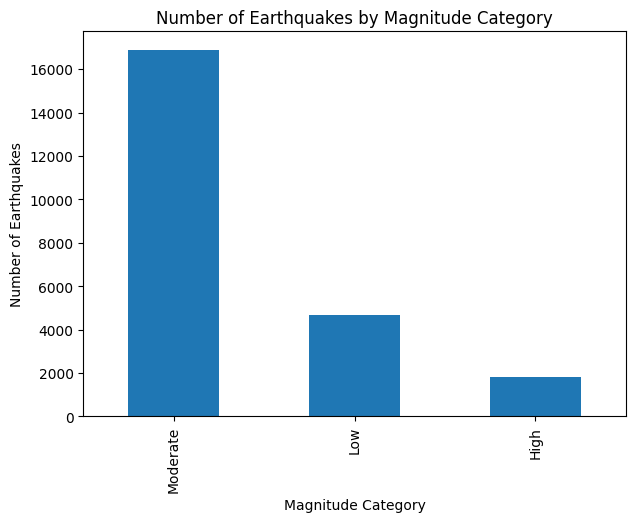

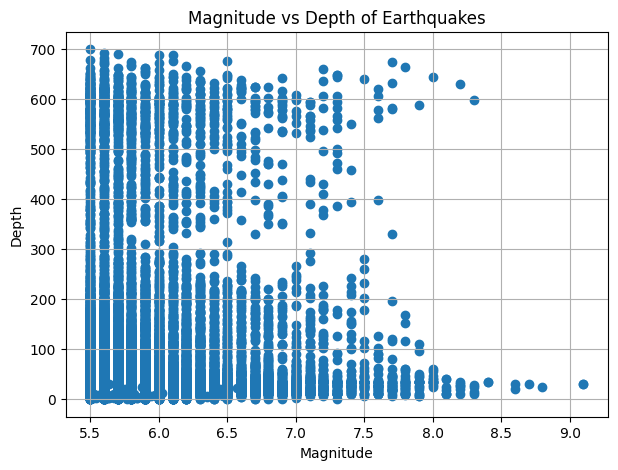

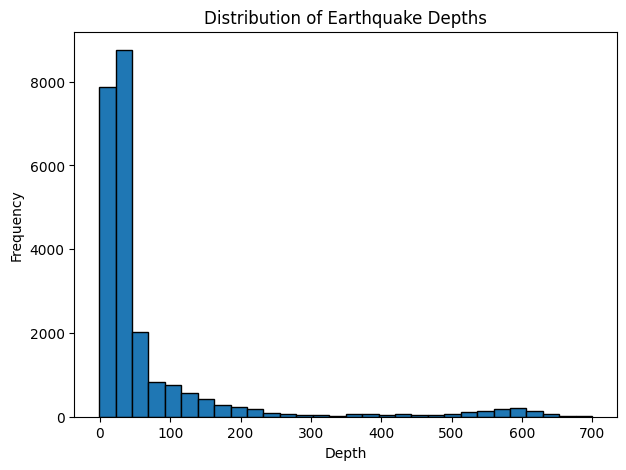

In [13]:
import matplotlib.pyplot as plt

line_chart_data = earthquakes_data.groupby('Year')['Magnitude'].mean()
plt.figure(figsize=(10, 5))
plt.plot(line_chart_data)
plt.title('Average Earthquake Magnitude by Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

bar_chart_data = earthquakes_data['Magnitude Category'].value_counts()
plt.figure(figsize=(7, 5))
bar_chart_data.plot(kind='bar')
plt.title('Number of Earthquakes by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Number of Earthquakes')
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(earthquakes_data['Magnitude'], earthquakes_data['Depth'])
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(earthquakes_data['Depth'], bins=30, edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

In [14]:
earthquakes_data['Date'] = pd.to_datetime(earthquakes_data['Date'], errors='coerce', utc=True)
earthquakes_data['Date'] = earthquakes_data['Date'].dt.tz_localize(None)

earthquakes_data['Day of Week'] = earthquakes_data['Date'].dt.day_name()

resampled_data = earthquakes_data.resample('Y', on='Date').size()

earthquakes_data[['Date', 'Day of Week']].head(), resampled_data.head()

(        Date Day of Week
 0 1965-01-02    Saturday
 1 1965-01-04      Monday
 2 1965-01-05     Tuesday
 3 1965-01-08      Friday
 4 1965-01-09    Saturday,
 Date
 1965-12-31    339
 1966-12-31    234
 1967-12-31    255
 1968-12-31    305
 1969-12-31    323
 Freq: A-DEC, dtype: int64)